**Внимание!!!** Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.

В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.

Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
которые необходимо произвести, что бы сопоставить признаки целевому значению.


**ПОДБОР ПАРАМЕТРОВ В ОТДЕЛЬНЫХ ФАЙЛАХ**, важно там сохранять ramdom_seed для повторимости результата
данные файлы обязательны к размещению в репозитории


**ЦЕЛЬ РАБОТЫ** построить модель **не более, чем на 20 признаках!** 

В Датасете есть гарантировано шумящие столбцы. Их нужно найти и удалить. Важно сохранить имена оставщихся столбцов (далее - значимых столбцов).

**Оценивается метрика MAPE, максимальная ошибка и найденые значимые для модели столбцы.**

**Дополнительный балл** оценить вклад значимых признаков (из mask) в максимальную ошибку на тренировочном наборе train значимых признаков (shap)

### Подключение библиотек

In [1]:
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR

### Обучение и выполнение лучшей модели

In [3]:
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения (тюник в сопровождающих файлах)

In [4]:
path_train = 'train_house.csv'
path_test = 'test_house.csv'

df_train = pd.read_csv(path_train)
X_test = pd.read_csv(path_test)

In [5]:
# Блок(и) обучения и поверки модели, а также отбора необходимых значимых столбцов

In [6]:
y = df_train['price']
X = df_train.drop(columns=['price'])
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True)

In [7]:
rfe_select = RFE(RandomForestRegressor(n_estimators=500), step = 1, 
                 n_features_to_select=19)
rfe_select.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(n_estimators=500), n_features_to_select=19)

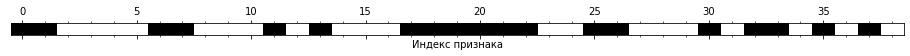

In [8]:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

In [9]:
X_train_imp = X_train[X_train.columns[mask]]
X_val_imp = X_val[X_train.columns[mask]]
features_names_imp = X_train.columns[mask]

In [10]:
features_names_imp

Index(['0', '1', '6', '7', '11', '13', '17', '18', '19', '20', '21', '22',
       '25', '26', '30', '32', '33', '35', '37'],
      dtype='object')

In [11]:
# Блок предсказания с использованием тестового набора

In [12]:
rf = RandomForestRegressor(bootstrap = True, ccp_alpha = 0.5, criterion='poisson', max_features = None, n_estimators = 200)
rf.fit(X[list(features_names_imp)], y)

RandomForestRegressor(ccp_alpha=0.5, criterion='poisson', max_features=None,
                      n_estimators=200)

In [13]:
# Маска отобраных ** НАЗВАНИЙ СТОЛБЦОВ ** для предсказания из тестового набора
mask = list(features_names_imp)
X_test = X_test[mask]

# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = rf.predict(X_test)

In [14]:
y_predict

array([3485.11628567, 4695.27505155, 3183.02509531, 3346.96646634,
       3189.41180912, 3123.64510355, 3020.19620682, 4081.06557755,
       2679.77868515, 2683.47615637, 2592.28899138, 2053.28779464,
       2808.77606698, 2960.57493682, 3364.94287146, 5132.83772266,
       3040.79527732, 4556.5986083 , 3166.86226598, 1690.83592717,
       2943.68667791, 2905.39529962, 4682.71759187, 4420.15420498,
       3174.73902596, 2634.87550163, 1989.29889919, 3317.70727876,
       2213.02622824, 2701.71071429, 4871.2745542 , 3897.20922938,
       3092.79650101, 3253.94560391, 2981.81302309, 4711.21229583,
       2558.15660659, 2750.89754453, 4915.96838299, 2324.00365256,
       4535.75371801, 3350.01291157, 1652.50866661, 4319.08908052,
       2673.80590907, 3911.24651447, 1640.72305985, 3231.6646503 ,
       2757.78873942, 4565.50733856, 2870.0071073 , 3073.47761415,
       4628.86095028, 2160.8508984 , 4466.02939515, 2478.52196178,
       2442.28868638, 3024.89782682, 2712.60864068, 4763.23458